# Challenge 1 - Energy Production Data Simulation

  The following notebook will make a prediction model for Energy Production using data from July 2011 to May 2013. The data is given by SMAP as a part of their data challenge. Though they're doing this as a way to find new employees, i'm just doing this out of practice and interest.

## Initial Survey of Data

First, we need to import all the modules necessary to look at the data, for now we'll just use numpy, pandas, and matplotlib.

In [25]:
%matplotlib inline
import numpy
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
train_df = pd.read_csv('../../data/training_dataset_500.csv')
test_df = pd.read_csv('../../data/test_dataset_500.csv')

Now we'll look at the training data

In [7]:
train_df.head()

,ID,Label,House,Year,Month,Temperature,Daylight,EnergyProduction
0,0,0,1,2011,7,26.2,178.9,740
1,1,1,1,2011,8,25.8,169.7,731
2,2,2,1,2011,9,22.8,170.2,694
3,3,3,1,2011,10,16.4,169.1,688
4,4,4,1,2011,11,11.4,169.1,650


Looking at this dataframe, we have no actual dates, so for time-series analysis, we're gonna change the year and month columns into a date.

In [8]:
train_date_df = pd.read_csv('../../data/training_dataset_500.csv', \
                            parse_dates={'date':[3,4]})

In [9]:
train_date_df.head(30)

,date,ID,Label,House,Temperature,Daylight,EnergyProduction
0,2011-07-01,0,0,1,26.2,178.9,740
1,2011-08-01,1,1,1,25.8,169.7,731
2,2011-09-01,2,2,1,22.8,170.2,694
3,2011-10-01,3,3,1,16.4,169.1,688
4,2011-11-01,4,4,1,11.4,169.1,650
5,2011-12-01,5,5,1,4.2,199.5,763
6,2012-01-01,6,6,1,1.8,203.1,765
7,2012-02-01,7,7,1,2.8,178.2,706
8,2012-03-01,8,8,1,6.7,172.7,788
9,2012-04-01,9,9,1,12.6,182.2,831


In [10]:
train_date_df.describe()

,ID,Label,House,Temperature,Daylight,EnergyProduction
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,5999.000000,11.000000,250.500000,14.372348,189.121870,612.748870
std,3464.251661,6.633538,144.343555,8.490811,29.432125,142.006144
min,0.000000,0.000000,1.000000,0.800000,133.700000,254.000000
25%,2999.500000,5.000000,125.750000,5.300000,169.100000,509.000000
50%,5999.000000,11.000000,250.500000,13.200000,181.800000,592.000000
75%,8998.500000,17.000000,375.250000,22.800000,205.200000,698.000000
max,11998.000000,22.000000,500.000000,29.000000,271.300000,1254.000000


As can be seen from the 30 entry data head and the column summary below it, there are 7 columns in the original data set and 6 in our train_date_df:
Date - merged from Month and Year into a Date from original df
Id - looks like primary key for each row listing
Label - Subset of labels, pertains to each Month Year combination in study: (0-22)
House - 500 in total, each house has a label over the 23 month period
Temperature - Most likely in Centigrade: range 0-29
Daylight - Not quite sure what this is, but it could be daylight in hours over monthly period
Energy Production - Again not sure of units (likely won't matter for machine learning analysis) but likely kWh

There are 11500 entries.
Let's see if there is any null data.

In [11]:
train_date_df.isnull().sum()

date                0
ID                  0
Label               0
House               0
Temperature         0
Daylight            0
EnergyProduction    0
dtype: int64

Now that we know the dataset is free of null entries, let's go ahead and do some cursory analysis

## Initial Data Analysis

As we are trying to predict energy production on a continuous scale, we know that we're likely going to be using some type of supervised regression algorithm (supervised - because we have desired training output, regression to fit the continuous output).

In [12]:
import seaborn as sns #seaborn is a library that allows pairwise plots between all variables to be made

In [13]:
sns.set(style='whitegrid',context='notebook')

In [19]:
cols = list(train_date_df.columns.values)

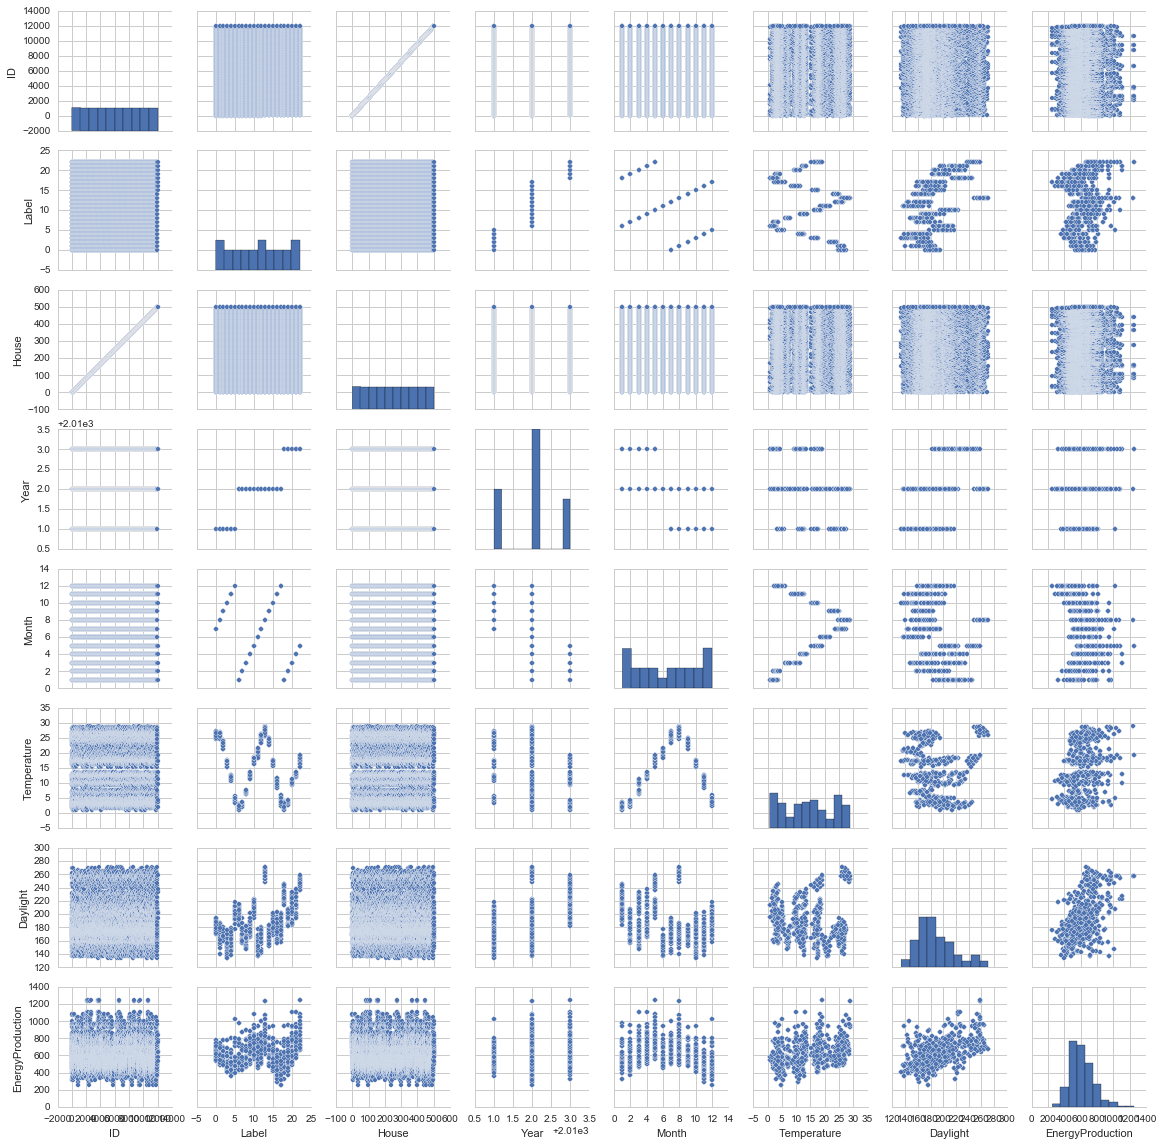

In [29]:
sns.pairplot(train_df,size =2)

In [30]:
plt.show()

While these plots look really congested, they do give us a bit of interesting information at first glance.  We notice a few things going down each row:

1. Id row - Remember, Id corresponds to a house in a given month/year, each sample. As a sanity check, we see that Id is uniformly distributed across Label, House, Year, and Month. We cursorily see that, there are some houses that reach have outliers with respect to temperature, daylight, and Energy Prod...but for the most part, there appears to be no strong difference between the houses in terms of the spread of Temperatures and daylight, however there do seem to be outliers in Energy production.

2.Label row - As could be predicted, temperature and daylight have strong relationships to month/year. The spread in temperature between all houses are fairly small, likely because temperatures spread over large areas. There is not much deviation between the temperatures experienced per month/year. But there does seem to be a spread in the amount of daylight that the 500 houses sees per month/year.  

3.The most obvious of these correlations is that of Daylight with Energy Production. We would expect the two to be positively correlated as the more sunlight there is, the more the liklihood for positive correlation. This correlation is not perfect however (as shown by the Daylight v. Energy Production plot

4. There does seem to be a slight correlation between temperature and energy production.

However, we can examine things deeper by grouping, filtering and aggregating.

In [41]:
# The following two entries segment out 1 house to determine if segmenting by house would provide more clarity to 
# analysis.

train_h1_df = train_date_df[train_date_df.House == 1]

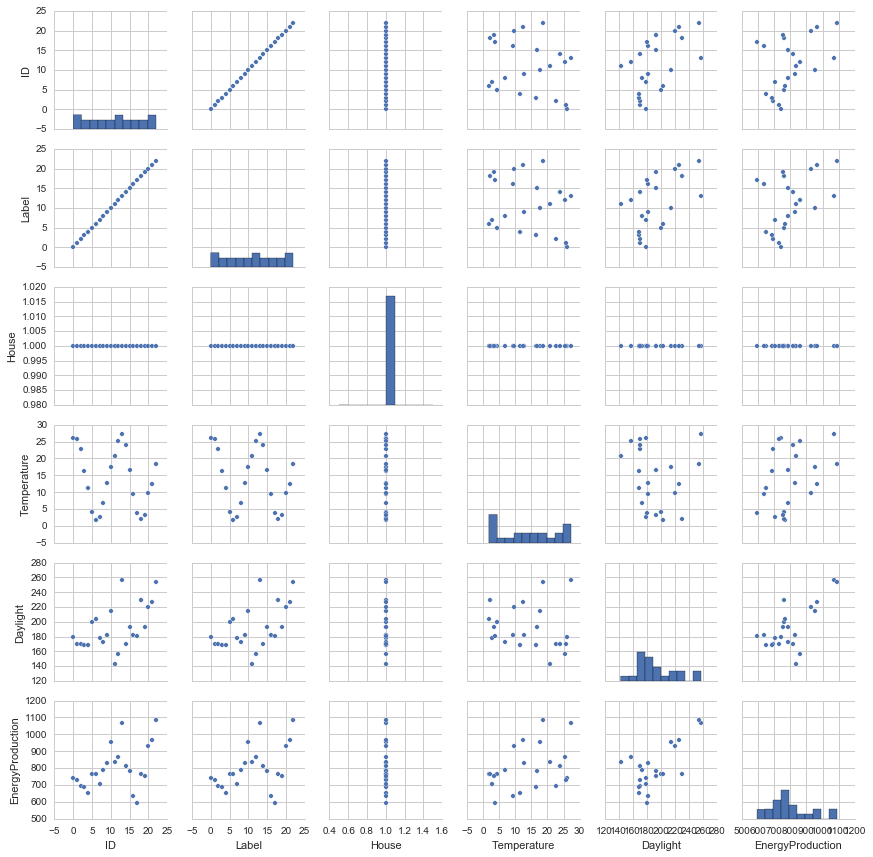

In [42]:
sns.pairplot(train_h1_df,size =2)

In [40]:
train_h1_df.describe()

,ID,Label,House,Year,Month,Temperature,Daylight,EnergyProduction
count,23.00000,23.00000,23,23.000000,23.000000,23.000000,23.000000,23.000000
mean,11.00000,11.00000,1,2011.956522,6.521739,13.995652,191.847826,800.478261
std,6.78233,6.78233,0,0.705708,3.603907,8.783429,29.661880,129.874019
min,0.00000,0.00000,1,2011.000000,1.000000,1.800000,143.000000,593.000000
25%,5.50000,5.50000,1,2011.500000,3.500000,5.450000,170.000000,718.500000
50%,11.00000,11.00000,1,2012.000000,7.000000,12.600000,182.000000,765.000000
75%,16.50000,16.50000,1,2012.000000,9.500000,21.800000,208.650000,850.000000
max,22.00000,22.00000,1,2013.000000,12.000000,27.400000,257.100000,1088.000000


As an aside, it'd be interesting to see how important the identity of the house is on Energy Production per month/year grouping. (Remember this is also known as the label). In general, we'd like to know how well each house individually produces energy (as shown in the sample plots of House 1 above.

It's likely that the solar installations from house to house are not the same. If this analysis was done for a company that was trying to help people optimize their solar energy production, we'd want to identify customers that are underperforming relative to other customers. One easy way of doing this would be to sum each house's energy production overall. However, these sums over energy production could be misleading, as a couple of outlying, overachieving production months could mask a consistently underproducing home. In addition, simply plotting and looking at a house's Energy Production for a given month/year would be difficult to discern as there are 500 houses for 23 diferent month/year time points.

A simpler metric would be to bin the Energy Production of each house into quantiles that are grouped by month/year. For example, the quartiles (25%, 50%, 75%)for Energy Production could be found for all houses (1-500) for July 2011. Then you could examine the distribution and determine if the house is consistently in a percentile.

This percentile score could further be propogated to predict ranges of energy production or production types from new houses (if there is a strong correlation found with the other given variables).

The downside to looking at this as a metric is that it will always change upon the addition of more homes to the data set.

We'll explore this ranking a little bit and then move on to finding a model for energy generation.
        

In [189]:
# creates df that bins and ranks data into quantiles (determined by quantile variable)
# this should later be muerged into the main training df
quantiles = 10
label_groupby_df = train_df.groupby(['Label'])
series_EP_rank = pd.qcut(label_groupby_df['EnergyProduction'].get_group(0),quantiles,labels=range(1,quantiles+1))
df_EP_rank = series_EP_rank.to_frame()
for i in list(train_df.Label.unique())[1:]:
    series_to_add = pd.qcut(label_groupby_df['EnergyProduction'].get_group(i),quantiles,labels=range(1,quantiles+1))
    df_to_add = series_to_add.to_frame()
    df_EP_rank = df_EP_rank.append(df_to_add)
df_EP_rank.sort_index()
#df_EP_rank.sort_index()

,EnergyProduction
0,10
1,10
2,10
3,10
4,10
5,9
6,9
7,10
8,10
9,10


In [182]:
pd.qcut(label_groupby_df['EnergyProduction'].get_group(3),4,labels=[1,2,3,4])
#df_a = a.to_frame()
#df_b = b.to_frame()
#df_a.head()
#df_b.head()
#df_a.append(df_b).sort_index().head()
#a=label_groupby_df['EnergyProduction'].get_group(0).quantile([.25,.5,.75,1.])
#q1,q2,q3,q4 = list(a)


3        4
26       2
49       3
72       1
95       1
118      4
141      4
164      3
187      1
210      2
233      2
256      4
279      3
302      2
325      4
348      2
371      3
394      3
417      2
440      1
463      3
486      3
509      1
532      4
555      1
578      4
601      4
624      4
647      2
670      3
        ..
10813    4
10836    1
10859    1
10882    1
10905    1
10928    2
10951    3
10974    2
10997    1
11020    2
11043    1
11066    2
11089    1
11112    3
11135    4
11158    3
11181    2
11204    2
11227    3
11250    1
11273    2
11296    4
11319    4
11342    1
11365    2
11388    1
11411    4
11434    4
11457    3
11480    3
Name: EnergyProduction, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [73]:
def quartile_lookup(quartile_df, df_to_label):
    
    

array([[1, 2, 1, 3, 0, 1, 2],
       [1, 2, 1, 3, 0, 1, 2],
       [1, 2, 2, 3, 0, 1, 2],
       [1, 2, 1, 3, 0, 1, 2],
       [1, 2, 1, 3, 0, 1, 2],
       [1, 2, 2, 3, 0, 1, 2],
       [1, 2, 1, 3, 0, 0, 2],
       [1, 2, 1, 3, 0, 1, 2],
       [1, 2, 2, 3, 0, 1, 2],
       [1, 2, 1, 3, 0, 0, 2],
       [1, 2, 1, 3, 0, 0, 2],
       [1, 2, 2, 3, 0, 0, 2],
       [1, 2, 1, 3, 0, 0, 2],
       [1, 2, 1, 3, 0, 0, 2],
       [1, 2, 2, 3, 0, 0, 2],
       [1, 2, 1, 3, 0, 0, 2],
       [1, 2, 1, 3, 0, 0, 2],
       [1, 2, 2, 3, 0, 0, 2],
       [1, 2, 1, 3, 0, 0, 3],
       [1, 2, 1, 3, 0, 0, 3],
       [1, 2, 2, 3, 0, 0, 3],
       [1, 2, 1, 3, 0, 0, 3],
       [1, 2, 1, 3, 0, 0, 3],
       [1, 2, 2, 3, 0, 0, 3],
       [1, 2, 1, 3, 0, 0, 3],
       [1, 2, 1, 3, 0, 0, 3],
       [1, 2, 2, 3, 0, 0, 3],
       [1, 2, 1, 3, 0, 0, 3],
       [1, 2, 1, 3, 0, 0, 3],
       [1, 2, 2, 3, 0, 0, 3],
       [1, 2, 1, 3, 0, 0, 3],
       [1, 2, 1, 3, 0, 0, 3],
       [1, 2, 2, 3, 0, 0, 3],
       [1,